In [3]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [4]:
df = pd.read_csv("../Datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df_encoded = pd.get_dummies(df, drop_first = True)
df_encoded.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [5]:
X = df_encoded.drop(columns=["charges"])
y = df_encoded["charges"]

In [7]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,True,False,True,False,False
1334,18,31.920,0,False,False,False,False,False
1335,18,36.850,0,False,False,False,True,False
1336,21,25.800,0,False,False,False,False,True


In [9]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [11]:
test_sizes = [0.3, 0.4, 0.5]

for i in test_sizes : 
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= i, random_state= 45)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test,y_pred)
    coefficients = pd.DataFrame(model.coef_, X.columns, columns = ["Coefficients"])

    print("\nFor the test size=", i)
    print("Mean Squared Error= ", mse)
    print("R squared score=  ", r2)
    print("\nCoefficients : \n", coefficients)



For the test size= 0.3
Mean Squared Error=  35412047.82475179
R squared score=   0.7110653571797572

Coefficients : 
                   Coefficients
age                 258.826137
bmi                 322.208058
children            431.599223
sex_male            100.124957
smoker_yes        24488.558885
region_northwest   -424.083666
region_southeast   -861.540658
region_southwest   -802.522512

For the test size= 0.4
Mean Squared Error=  35044336.384698294
R squared score=   0.7276871819620958

Coefficients : 
                   Coefficients
age                 262.532590
bmi                 319.592673
children            385.334036
sex_male            -94.712397
smoker_yes        24496.509114
region_northwest   -561.525260
region_southeast   -790.417319
region_southwest   -794.865499

For the test size= 0.5
Mean Squared Error=  36919800.44374328
R squared score=   0.7157318310340197

Coefficients : 
                   Coefficients
age                 270.457476
bmi                 34

In [12]:
model.score(X,y)

0.7484414146442958

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

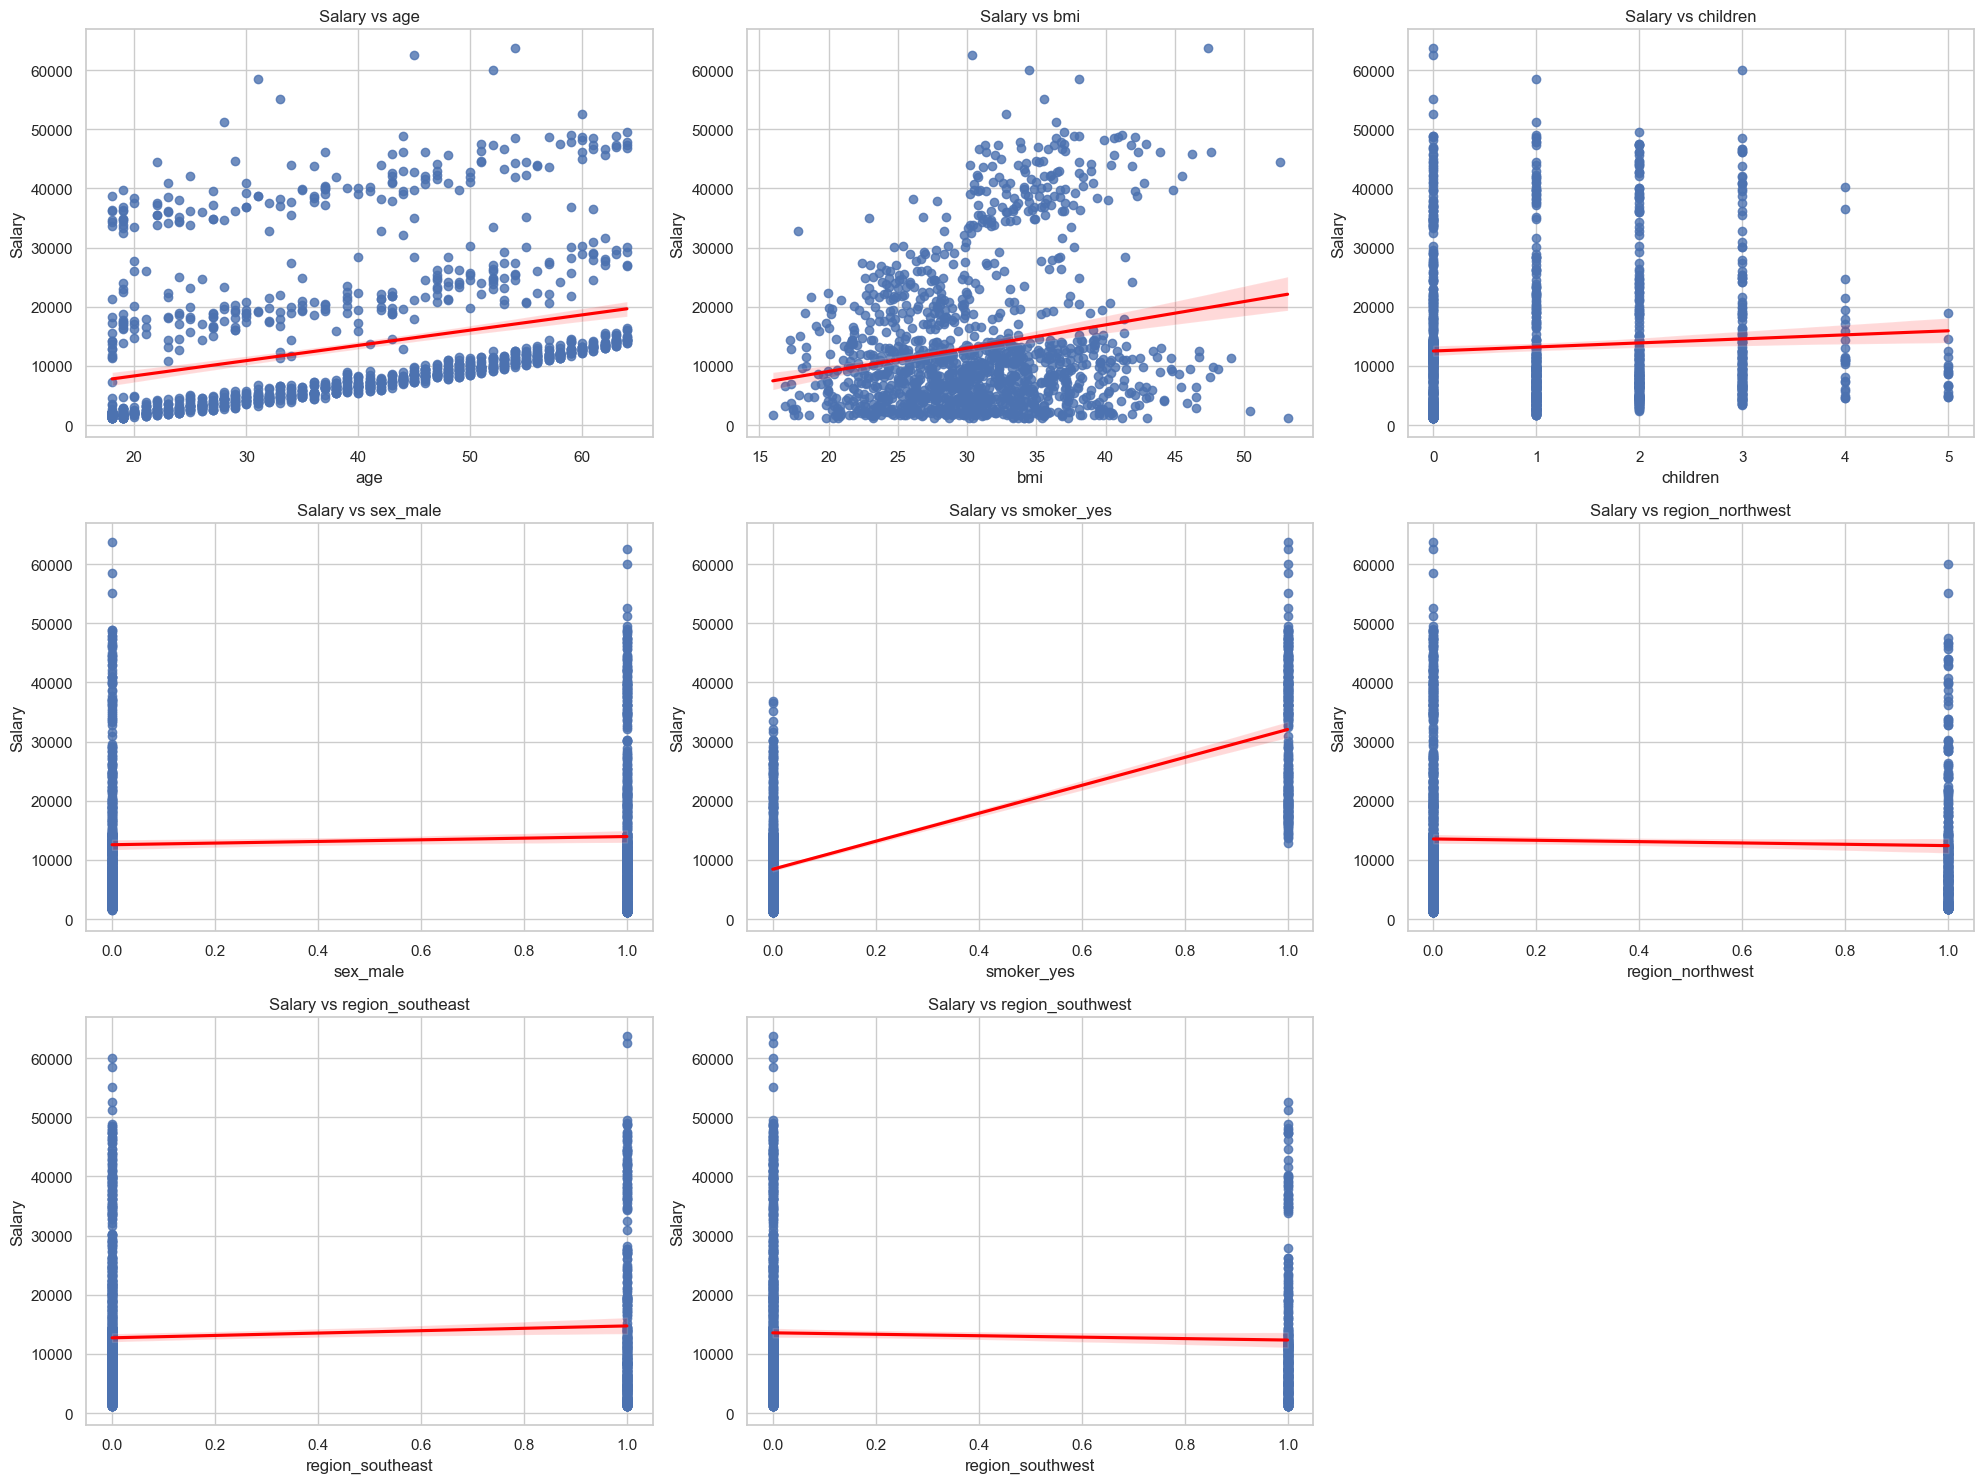

In [25]:
sns.set(style="whitegrid")
features = X.columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.regplot(x=X[feature], y=y, line_kws={"color":"red"})
    plt.title(f'Salary vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Salary')
# plt.scatter(y_test, y_pred)
# plt.title("Actual VS Predicted Values")
# plt.xlabel("Actual Value")
plt.tight_layout()
# plt.ylabel("Predicted Values")
plt.show()

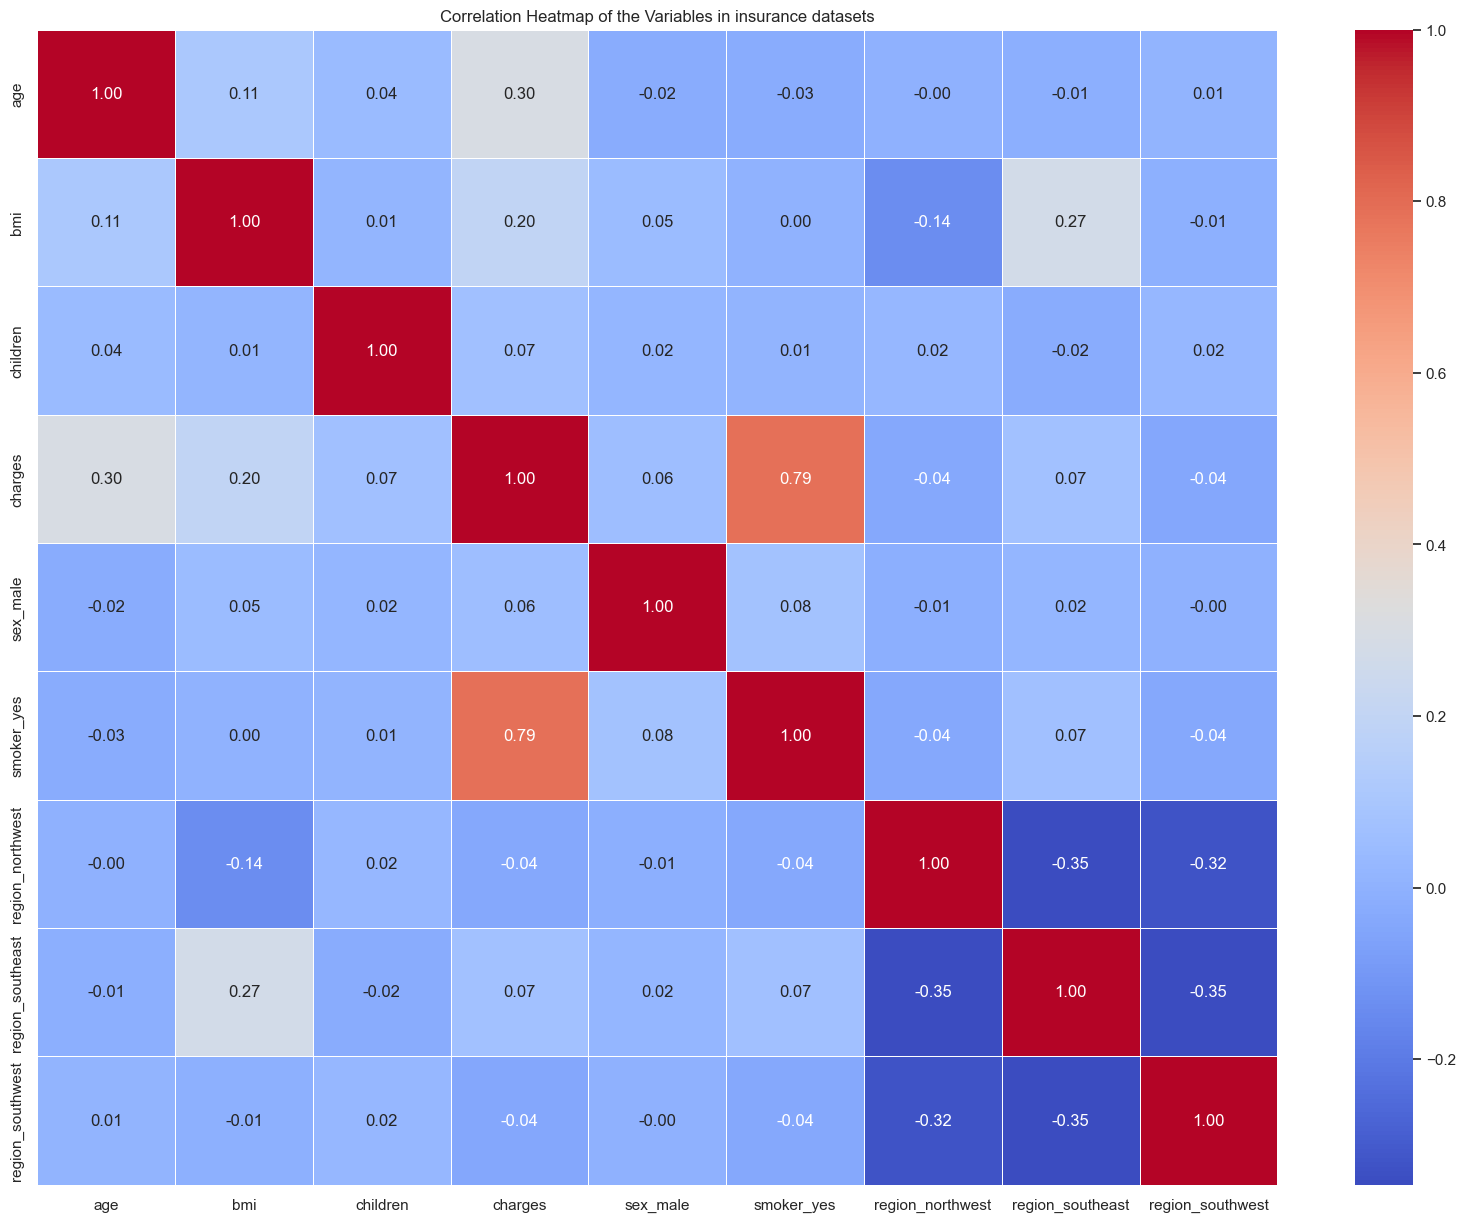

In [35]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(20, 15))

sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", fmt = ".2f", linewidths="0.5" )

plt.title("Correlation Heatmap of the Variables in insurance datasets")

plt.show()